# Show function

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show(*images):
    for i in images:
        image = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.show()


# Detector

In [125]:
import cv2
import numpy as np

def detector_samples(paths):
    kpts = {}
    dscpt = {}
    orb = cv2.ORB.create()
    
    for p in paths:
        img = cv2.imread(p)
        kpts[p], dscpt[p] = orb.detectAndCompute(img, None)
    
    return kpts, dscpt

In [43]:
def detector_test(path):
    
    img = cv2.imread(path)
    orb = cv2.ORB.create()
    kpts, dscpt = orb.detectAndCompute(img, None)
   
    return kpts, dscpt

# Matcher

In [222]:
def matching_criterion(matches):
    num = 0
    
    for m, n in matches:
        if m.distance < 0.6 *n.distance:
            num +=1
    
    print(num)
    return num

In [223]:
def matcher(kpts, dscpt, path_to_test, show_matches=False):

    kpts_test, dscpt_test = detector_test(path_to_test)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)

    matches = {}
    for key in dscpt.keys():
        matches[key] = bf.knnMatch(dscpt[key], dscpt_test, k=2)
    label = max(matches, key=lambda k: matching_criterion(matches[k]))
    print(label)

    if show_matches:
        img_matches = cv2.drawMatchesKnn(cv2.imread(label), kpts[label], cv2.imread(path_to_test), kpts_test, matches[label], cv2.imread(path_to_test), flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
        show(img_matches)

    return matches        

# Database creation

In [149]:
#"training"
kpts, dscpt = detector_samples(["samples/strings.png", "samples/keyboards.png", "samples/mixer.png"])

# Test on samples

25
0
0
samples/strings.png


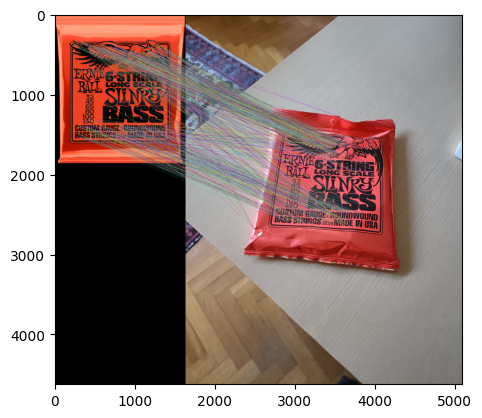

In [224]:
#matching
matches = matcher(kpts, dscpt, "test/strings.jpg", show_matches=True)